<a href="https://colab.research.google.com/github/nikishkaaa/ML-Course/blob/main/HW_2_4_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі чотири лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls 'drive/MyDrive/ML Course'

application_data.csv.zip	HW_2_1_Аналіз_ознак_для_побудови_лінійної_регресії.ipynb
application_data_processed.zip	medical-charges.csv


In [4]:
df = pd.read_csv("drive/MyDrive/ML Course/medical-charges.csv")
non_smoker_df = df[df.smoker == 'no']

## MNK

In [5]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [6]:
X = non_smoker_df[['age']]

In [7]:
y = non_smoker_df['charges']
y

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [8]:
y.describe()

count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64

In [9]:
def normal_equations(X,y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [10]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X_with_intercept

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       ...,
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 21.]])

In [11]:
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([-2091.42055657,   267.24891283])

In [12]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

In [13]:
predictions_MNK

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

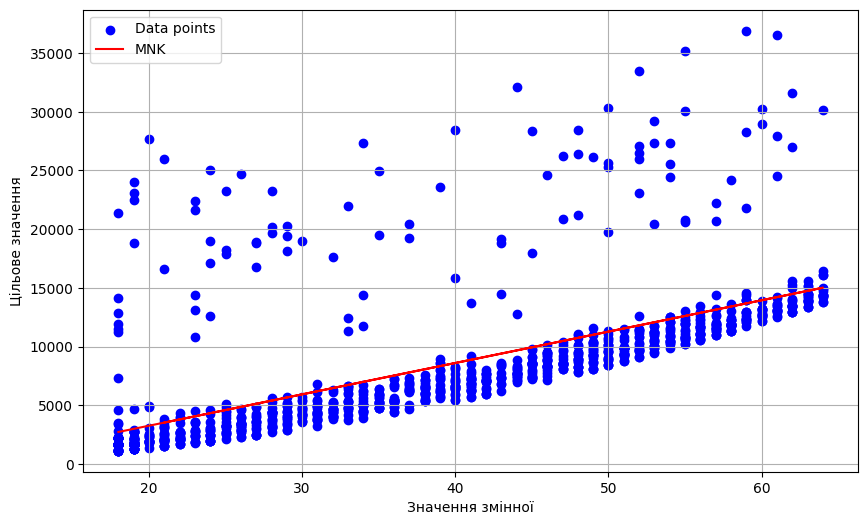

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], y, color='blue', label='Data points')
plt.plot(X.iloc[:, 0], predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
y_true = y.to_numpy()

In [16]:
mean_squared_error(y_true , predictions_MNK, squared=False)

4662.505766636395

## Full-Batch градієнтного спуску з numpy

In [17]:
X = X.to_numpy()

In [18]:
X, len(X)

(array([[18],
        [28],
        [33],
        ...,
        [18],
        [18],
        [21]]),
 1064)

In [19]:
y_true, len(y_true)

(array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
         1629.8335 ,  2007.945  ]),
 1064)

### Для learning rate = 0.001

In [20]:
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
       y_pred = m * X[:, 0] + b
       error = y_pred - y
       errors.append(sum(error**2))
       m_gradient = (2/n) * np.dot(error, X[:, 0])
       b_gradient = (2/n) * np.sum(error)
       m = m - lr * m_gradient
       b = b - lr * b_gradient
    return m, b, errors

In [22]:
m, b, errors = full_batch_gradient_descent(X, y_true, lr=0.001, epochs=100)
predictions_fbgd = m * X[:, 0] + b
print('Передбачення: ', predictions_fbgd )
print('Коефіцієнти моделі: ', m, b)
print('RMSE: ', mean_squared_error(y_true , predictions_fbgd , squared=False))

Передбачення:  [-2.51731726e+43 -3.91407969e+43 -4.61246090e+43 ... -2.51731726e+43
 -2.51731726e+43 -2.93634599e+43]
Коефіцієнти моделі:  -1.3967624262082842e+42 -3.1448925830775484e+40
RMSE:  5.844970923943406e+43


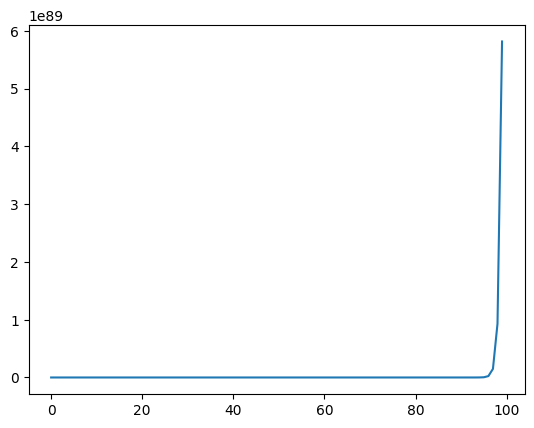

In [23]:
plt.plot(errors);

### Для learning rate = 0.00001

In [24]:
m, b, errors = full_batch_gradient_descent(X, y_true, lr=0.00001, epochs=10000)
predictions_fbgd1 = m * X[:, 0] + b
print('Передбачення: ', predictions_fbgd1 )
print('Коефіцієнти моделі: ', m, b)
print('RMSE: ', mean_squared_error(y_true , predictions_fbgd1, squared=False))

Передбачення:  [3937.90153152 6148.94726884 7254.47013751 ... 3937.90153152 3937.90153152
 4601.21525271]
Коефіцієнти моделі:  221.10457373276387 -41.980795673907885
RMSE:  4713.2506061057


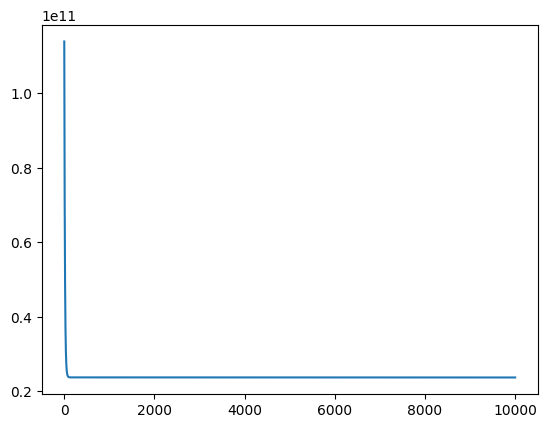

In [25]:
plt.plot(errors);

### Для learning rate = 0.005

In [26]:
m, b, errors = full_batch_gradient_descent(X, y_true, lr=0.005, epochs=100)
predictions_fbgd2 = m * X[:, 0] + b
print('Передбачення: ', predictions_fbgd2 )
print('Коефіцієнти моделі: ', m, b)
print('RMSE: ', mean_squared_error(y_true , predictions_fbgd2, squared=False))

Передбачення:  [-2.25551484e+125 -3.50701318e+125 -4.13276235e+125 ... -2.25551484e+125
 -2.25551484e+125 -2.63096434e+125]
Коефіцієнти моделі:  -1.2514983424749625e+124 -2.8178219725366875e+122
RMSE:  5.237090636084106e+125


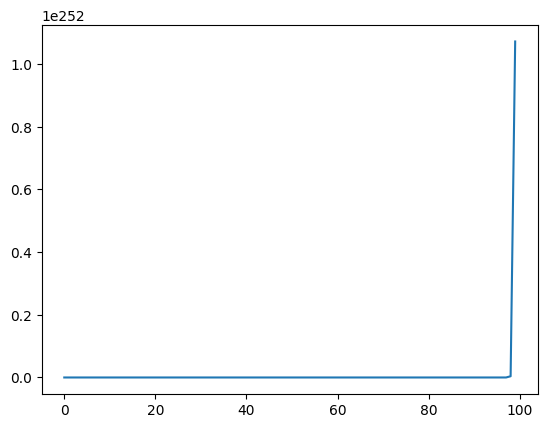

In [27]:
plt.plot(errors);

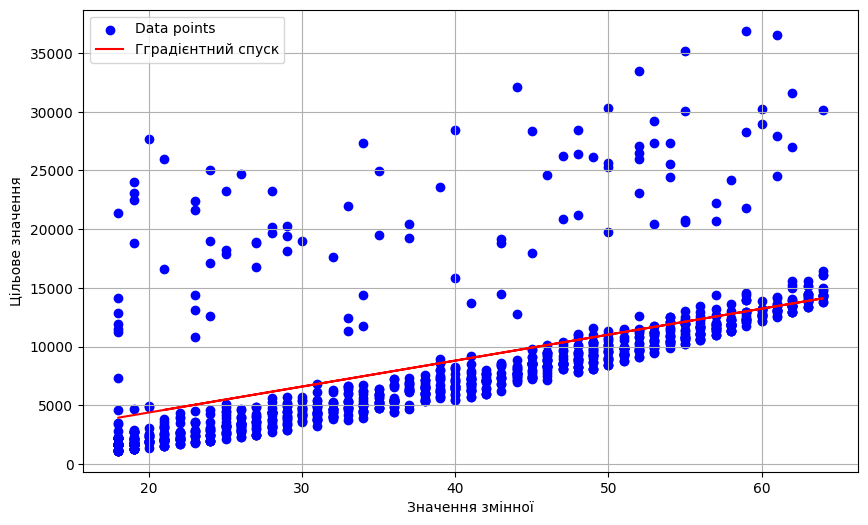

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y_true, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_fbgd1, color='red', label='Гградієнтний спуск')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

## LinearRegression

In [29]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [40]:
lin_reg.fit(X, y_true)

LinearRegression()

In [31]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), -2091.4205565650864)

In [33]:
predictions = lin_reg.predict(X)

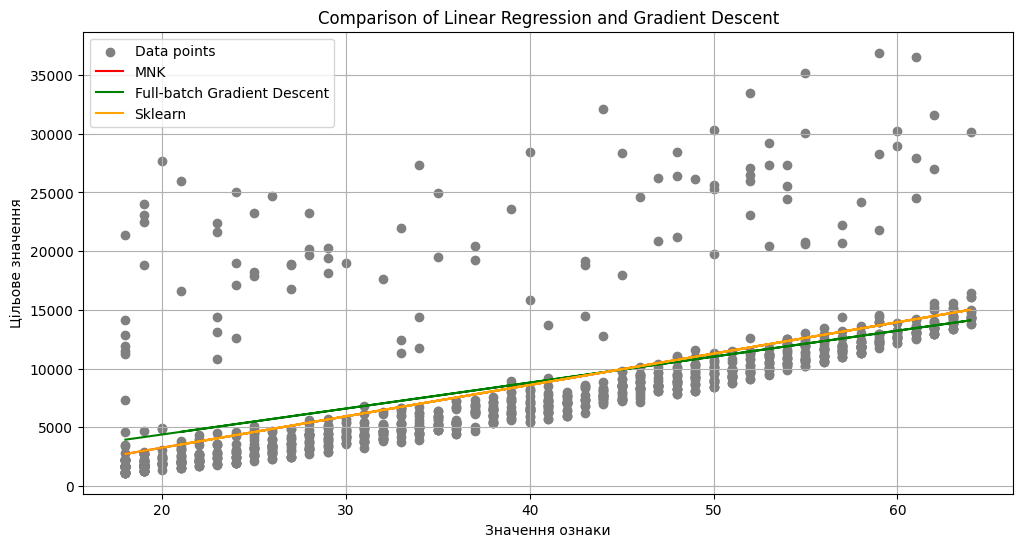

In [66]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='grey', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd1, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions, color='orange', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
rmse_mnk = mean_squared_error(y, predictions_MNK, squared=False)
print('RMSE МНК: ', rmse_mnk)

rmse_sgd = mean_squared_error(y, predictions_fbgd1, squared=False)
print('RMSE град. спуску: ', rmse_sgd)

rmse_sklearn = mean_squared_error(y, predictions, squared=False)
print('RMSE sklearn: ', rmse_sklearn)

RMSE МНК:  4662.505766636395
RMSE град. спуску:  4713.2506061057
RMSE sklearn:  4662.505766636395


### Висновок: отже, результати для МНК і лінійної регресії з бібліотеки sklearn збігаються. І коефіцієнти з цих методів є найкращими для цього набору даних, так як rmse дня них нижче, ніж для град. спуску

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [46]:
smokers = df[df['smoker']=='yes']
smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [47]:
X_smoker = smokers[['age']]
X_smoker

,age
0,19
11,62
14,27
19,30
23,34
...,...
1313,19
1314,30
1321,62
1323,42


In [48]:
y_smoker = smokers[['charges']]

In [49]:
lin_regres = LinearRegression()

In [50]:
lin_regres.fit(X_smoker, y_smoker)

LinearRegression()

In [51]:
lin_regres.coef_,  lin_regres.intercept_

(array([[305.23760211]]), array([20294.12812692]))

In [53]:
predict = lin_regres.predict(X_smoker)

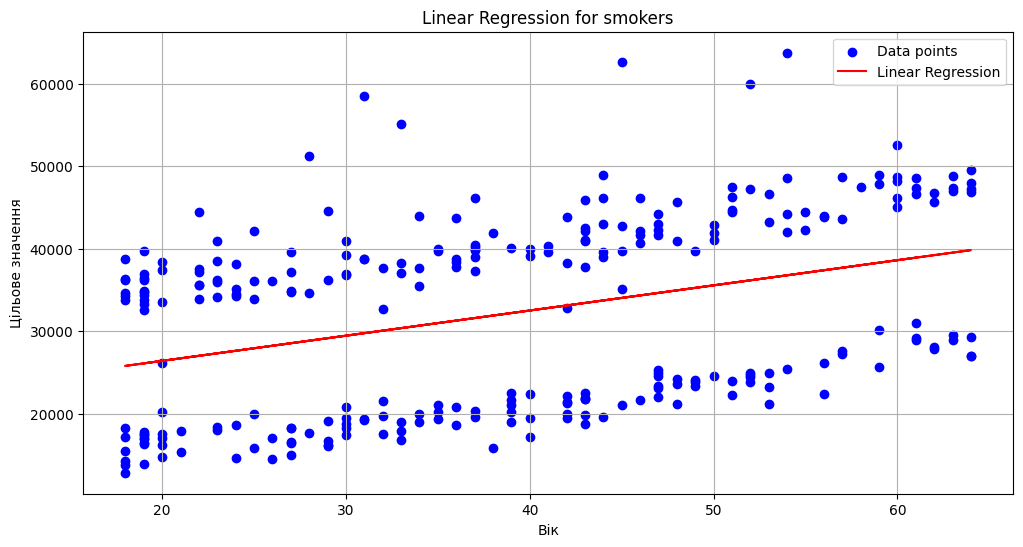

In [60]:
plt.figure(figsize=(12, 6))
plt.scatter(X_smoker.iloc[:, 0], y_smoker, color='blue', label='Data points')
plt.plot(X_smoker.iloc[:, 0], predict, color='red', label='Linear Regression')
plt.title('Linear Regression for smokers')
plt.xlabel('Вік')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
print('Коефіцієнти: ', lin_regres.coef_, ' ', lin_regres.intercept_)
print('RMSE: ', mean_squared_error(y_smoker, predict, squared=False))

Коефіцієнти:  [[305.23760211]]   [20294.12812692]
RMSE:  10711.00334810241


In [62]:
y_smoker.describe()

,charges
count,274.000000
mean,32050.231832
std,11541.547176
min,12829.455100
25%,20826.244213
50%,34456.348450
75%,41019.207275
max,63770.428010


Висновок: лінійна регресія для не курців пряцює погано, так як RMSE наближається на стандартного відхилення. Цю модель я би не використовувала в компанії